# Mountain cart

This is the notebook for the implement the mountain cart problem. 
It is divided into:
1. Random Agent
2. DQN approach
3. Dyna approach

In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **1.** Random Agent

In [4]:
from RandomAgent import RandomAgent

env = gym.make('MountainCar-v0') #, render_mode = "human"
agent = RandomAgent(env)
num_episodes = 100

rewards = []
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, truncated, _ = env.step(action)
        agent.observe(state, action, next_state, reward)
        agent.update()
        total_reward += reward
        state = next_state

    rewards.append(total_reward)

  4%|▍         | 4/100 [00:15<06:15,  3.91s/it]


KeyboardInterrupt: 

Text(0.5, 0, 'Episode number')

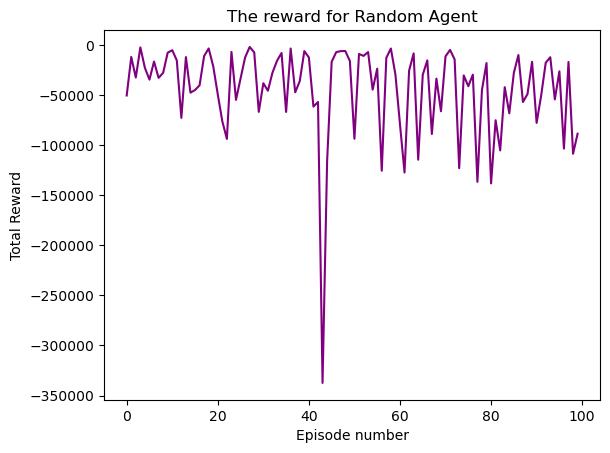

In [23]:
fig, ax = plt.subplots()
ax.plot(rewards, color = "purple")
ax.set_title("The reward for Random Agent")
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode number")

In [6]:
n_episodes=100
durations=[]
for i in tqdm(range(n_episodes)):
    t0 = time()
    done = False
    state, info = env.reset()
    episode_reward = 0
    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)

        episode_reward += reward

        state = next_state
        done = terminated or truncated
    t1=time()
    durations.append(t1-t0)

100%|██████████| 100/100 [00:01<00:00, 59.95it/s]


Text(0.5, 1.0, 'Duration of episodes')

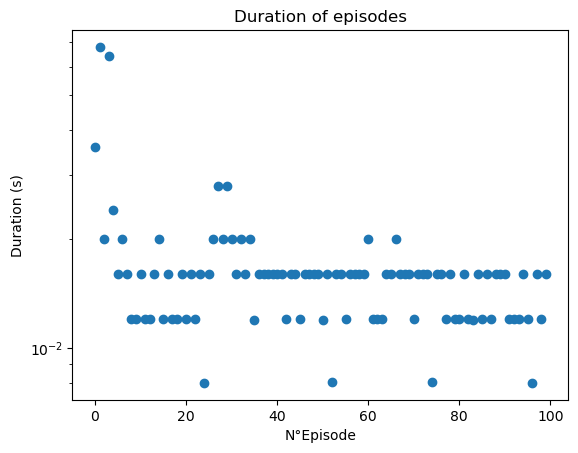

In [9]:
plt.scatter(range(n_episodes),durations)
plt.yscale('log')
plt.xlabel('N°Episode')
plt.ylabel('Duration (s)')
plt.title('Duration of episodes')

# **2.** DQN Agent

In [2]:
from DQN_type import DQNAgent, DQNnetwork

env = gym.make('MountainCar-v0') #, render_mode = "human"
state_size, action_size = env.observation_space.shape[0], env.action_space.n
agent = DQNAgent(env, state_size, action_size)

In [34]:
num_episodes = 10

rewards = []
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, truncated, _ = env.step(action)
        agent.observe(state, action, next_state, reward, done)
        agent.update()
        total_reward += reward
        state = next_state

    rewards.append(total_reward)
    # print(f"For episode {episode} the total reward is {total_reward}.")

In [ ]:
fig, ax = plt.subplots()
ax.plot(rewards, color = "purple")
ax.set_title("The reward for Random Agent")
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode number")